In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random

In [2]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname(os.path.abspath(''))))

In [3]:
from classes.agent import AgentState
from classes.news import News
from classes.utils import construct_world_given_graph
from Graph_Structure_Experiment import build_graph

In [4]:
def create_sensation_map(num_additional_edges, centralisation, num_agents=500, num_samples=10, initial_active_agents=5, sensation_news = 0.5):
    agent_names = list(range(num_agents))
    thresholds = np.random.random(num_agents)
    independences = (1/100)*np.random.random(num_agents)
    
    df = pd.DataFrame(columns=['additional_edges', 'centralisation', 'number active'])
    nw = News(1, sensation=sensation_news, decay_parameter=0)
    news = {nw.name: nw}
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')  
    for k in num_additional_edges:
        print(k, end='\r')
        for z in centralisation:
            print('k: ',k,'z: ',z, end='\r')
            samples = []
            for _ in range(num_samples):
                graph = build_graph(num_nodes = num_agents, number_of_additional_edges=k, centralisation=z)
                world = construct_world_given_graph(agent_names, thresholds, independences, news, graph)

                initial_agent_names = np.random.choice(agent_names, initial_active_agents, replace=False)
                for i in range(initial_active_agents):
                    world.agents[initial_agent_names[i]].states[nw.name] = AgentState.ACTIVE
                
                number_active, _, _ = world.full_dynamics()
                samples.append(number_active)
            
            df_active = pd.DataFrame([[k, z, np.mean(samples) / num_agents]], columns=df.columns)
            df = df.append(df_active, ignore_index=True)
            
    print('Simulation completed!!!')
    return df.astype(float).pivot('additional_edges', 'centralisation', 'number active')

In [5]:
centralisation = np.linspace(0.0, 1.0, 11)
num_additional_edges = np.logspace(start=1,stop=4,num=10,base = 10, dtype = int)


sensation_map = create_sensation_map(num_additional_edges, centralisation)

Starting simulation with 500 agents (this may take some time...)
Simulation completed!!!


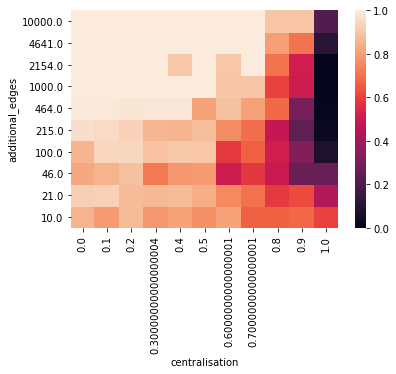

In [6]:
ax = sns.heatmap(sensation_map, vmin=0, vmax=1.0)
ax.invert_yaxis()